In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Basic data exploration
print(df.head())
print(df.info())
print(df.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes:

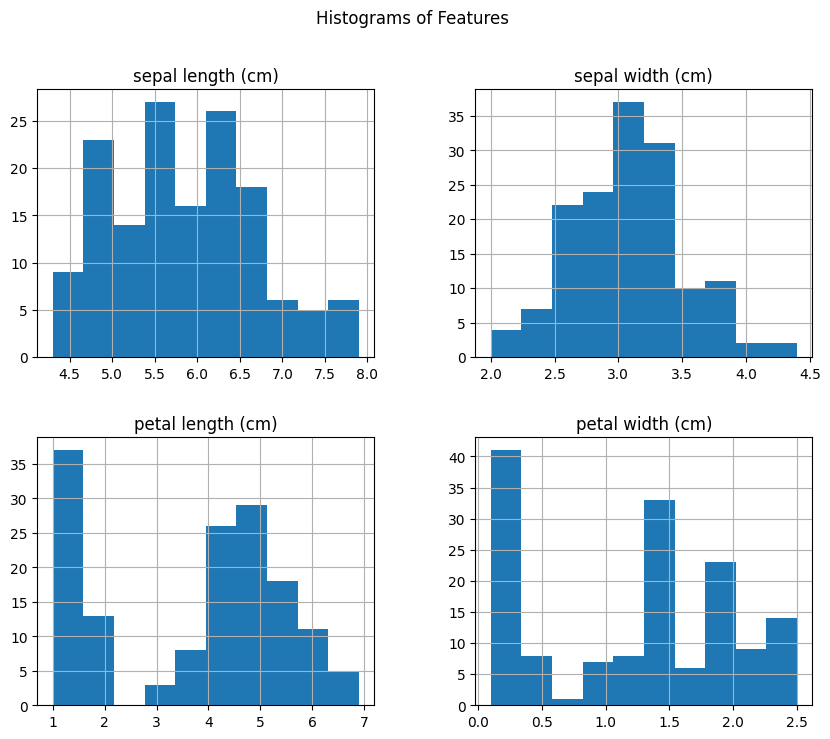

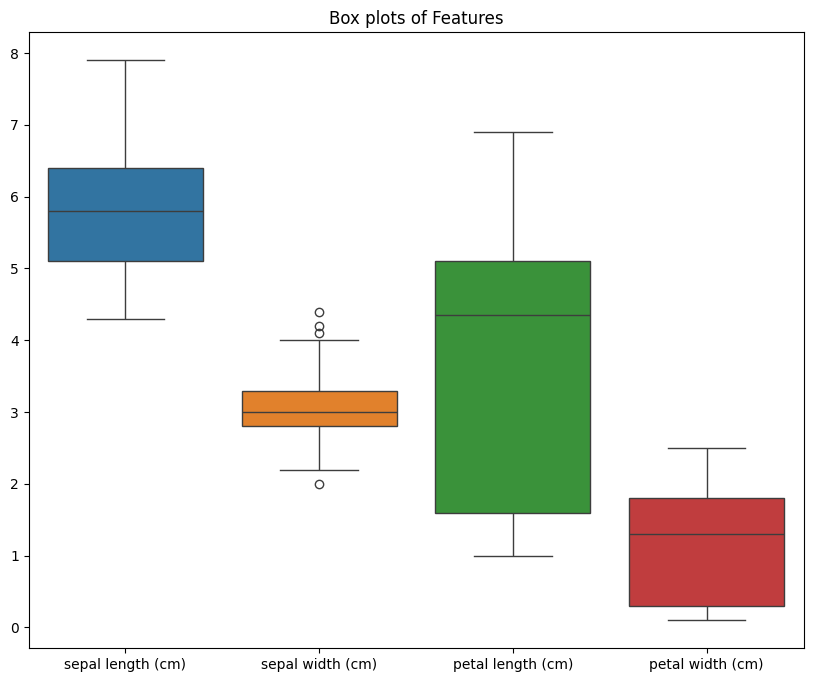

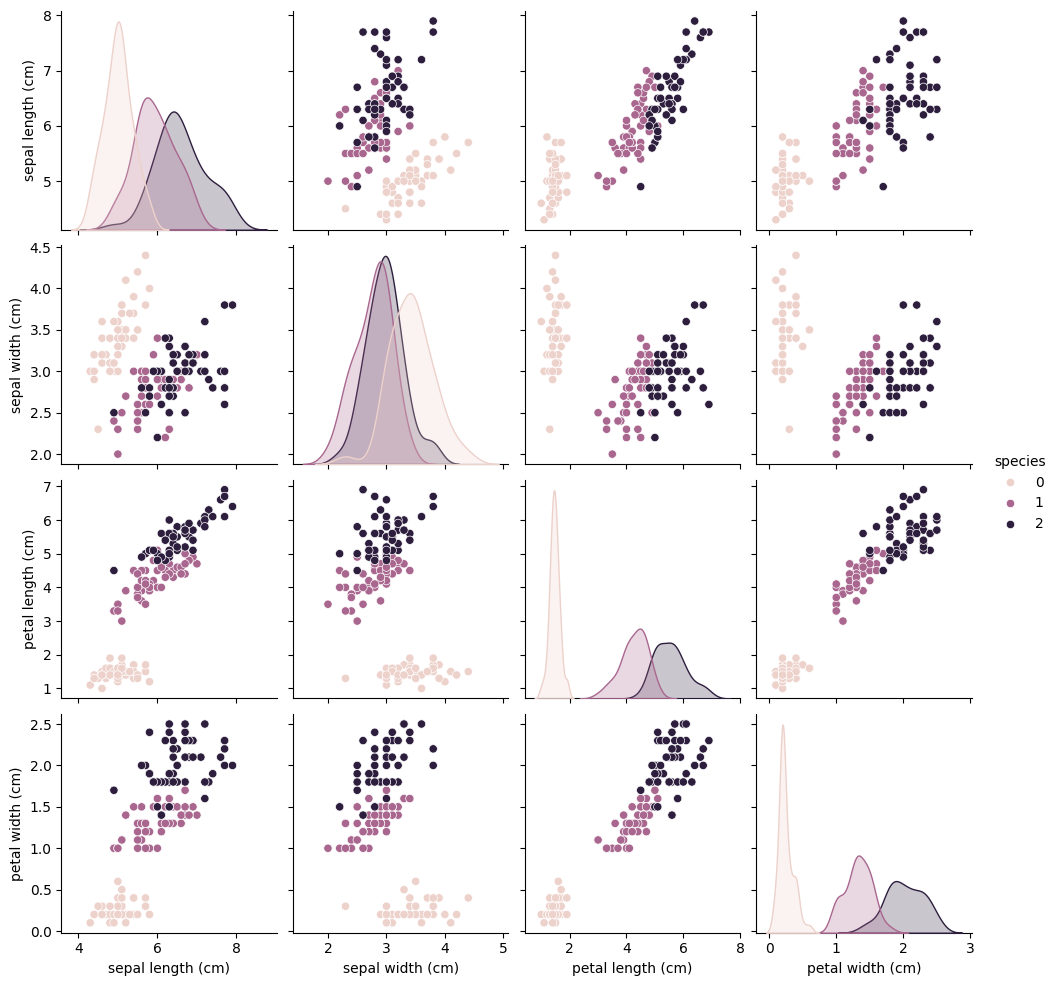

In [ ]:
# Histograms for all features
df.drop('species', axis=1).hist(figsize=(10, 8))
plt.suptitle('Histograms of Features')
plt.show()

# Box plots for all features
plt.figure(figsize=(10, 8))
sns.boxplot(data=df.drop('species', axis=1))
plt.title('Box plots of Features')
plt.show()

# Pair plot to examine relationships between features
sns.pairplot(df, hue='species')
plt.show()


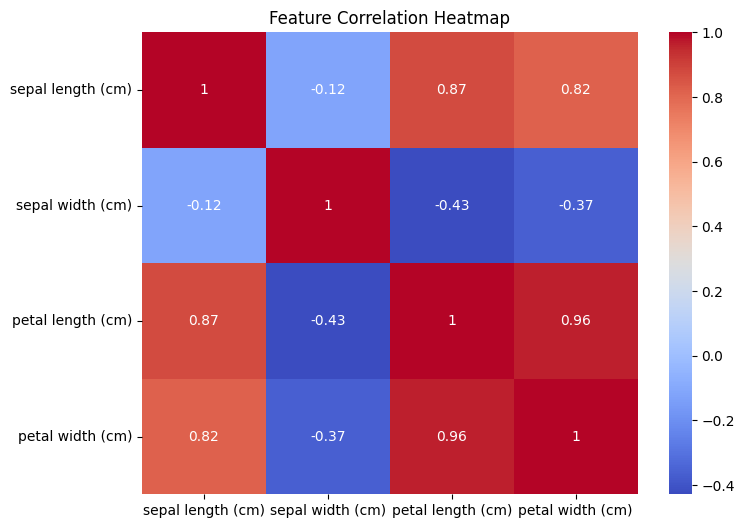

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['species'], axis=1))


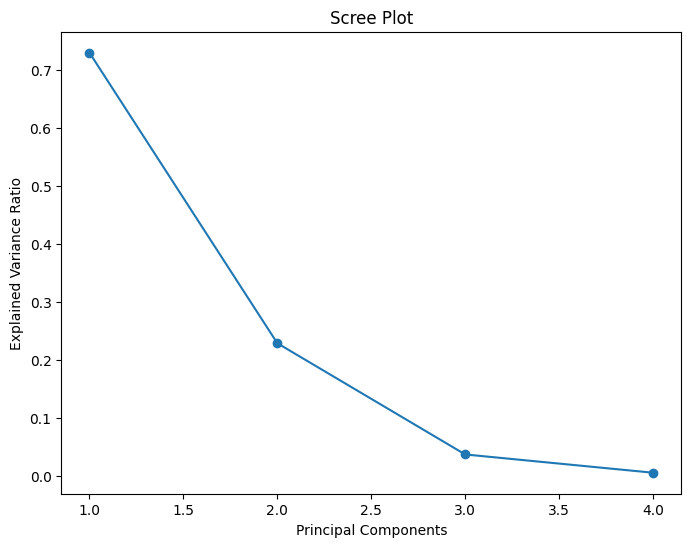

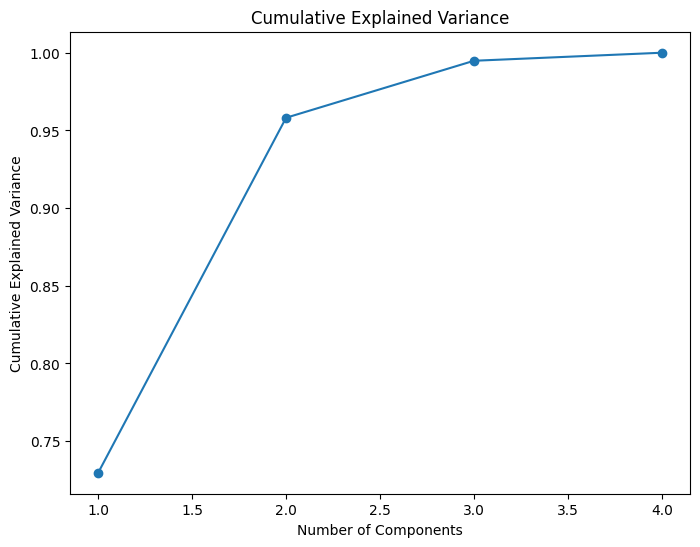

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot (variance explained by each component)
plt.figure(figsize=(8, 6))
plt.plot(range(1, X_scaled.shape[1] + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, X_scaled.shape[1] + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


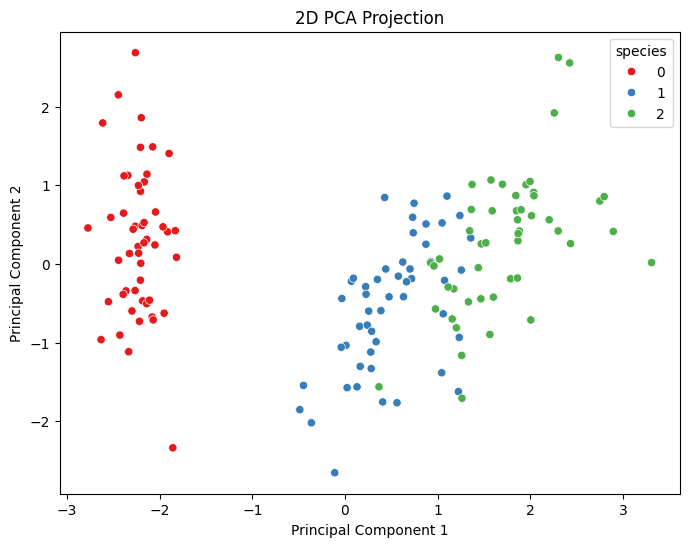

In [ ]:
# Using the first two principal components
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_scaled)

# Visualize the 2D projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], hue=df['species'], palette='Set1')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


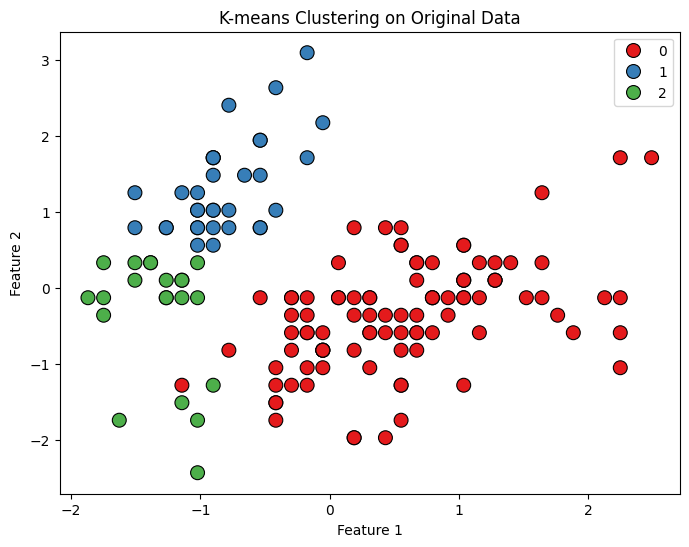

Silhouette Score for K-means on original data: 0.4798814508199817


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-means clustering (let's assume 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set1', s=100, edgecolor='black')
plt.title('K-means Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluate the clustering performance
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f'Silhouette Score for K-means on original data: {silhouette_kmeans}')


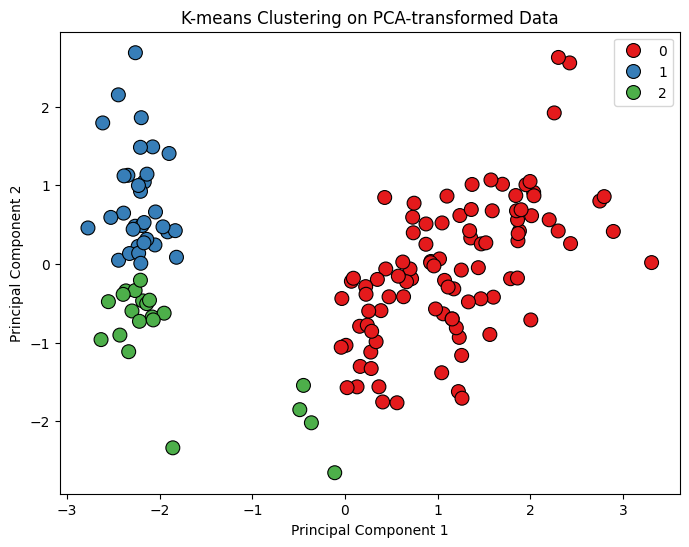

Silhouette Score for K-means on PCA data: 0.5227910941742375


In [ ]:
# Apply K-means clustering to PCA data (2 principal components)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(X_pca_2)

# Visualize the clustering results on PCA data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], hue=kmeans_labels_pca, palette='Set1', s=100, edgecolor='black')
plt.title('K-means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate the clustering performance on PCA data
silhouette_kmeans_pca = silhouette_score(X_pca_2, kmeans_labels_pca)
print(f'Silhouette Score for K-means on PCA data: {silhouette_kmeans_pca}')


Number of Components: 1, Silhouette Score: 0.6193, Inertia: 93.9794
Number of Components: 2, Silhouette Score: 0.6024, Inertia: 236.4775
Number of Components: 3, Silhouette Score: 0.4882, Inertia: 491.2306
Number of Components: 4, Silhouette Score: 0.4368, Inertia: 653.4027
Number of Components: 5, Silhouette Score: 0.3985, Inertia: 808.2812
Number of Components: 6, Silhouette Score: 0.3730, Inertia: 924.2017
Number of Components: 7, Silhouette Score: 0.3535, Inertia: 1022.5050
Number of Components: 8, Silhouette Score: 0.3402, Inertia: 1084.6644
Number of Components: 9, Silhouette Score: 0.3310, Inertia: 1136.6794
Number of Components: 10, Silhouette Score: 0.3229, Inertia: 1182.9080


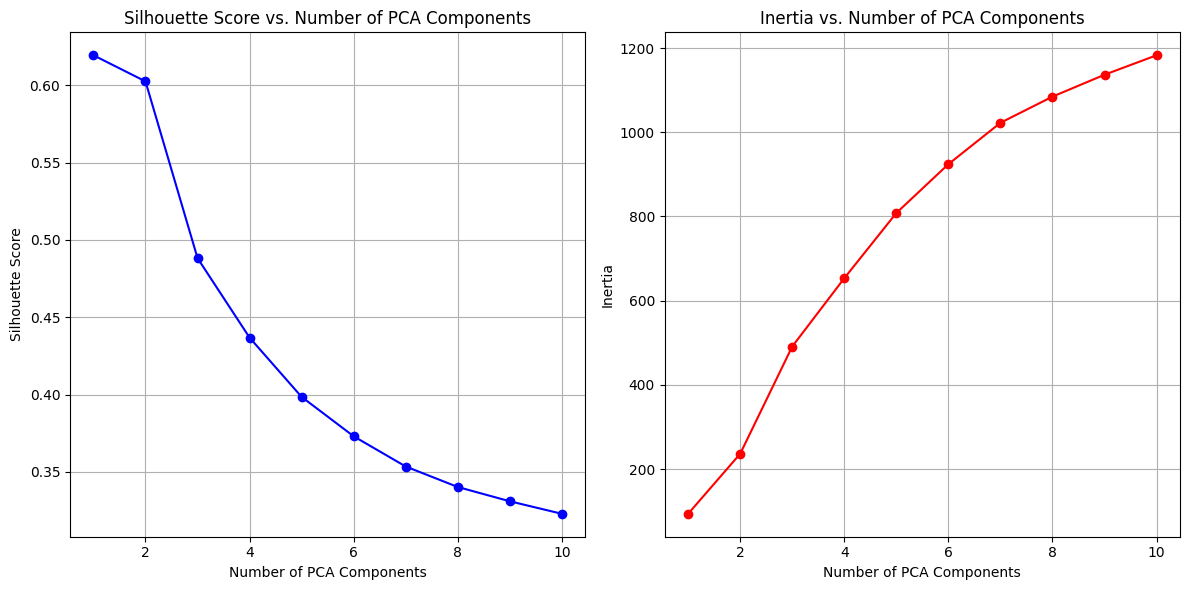

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your data
# Replace this with your actual dataset
data = pd.read_csv('wine.csv')

# Preprocessing: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Define a function to perform PCA and KMeans clustering
def perform_pca_kmeans(n_components, data):
    # Apply PCA with the given number of components
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(data)

    # Perform KMeans clustering on the transformed PCA data
    kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
    kmeans.fit(pca_data)

    # Calculate silhouette score to evaluate clustering quality
    silhouette_avg = silhouette_score(pca_data, kmeans.labels_)

    return silhouette_avg, kmeans.inertia_, pca_data

# Experiment with different numbers of components
components_range = range(1, 11)  # Try 1 to 10 components
silhouette_scores = []
inertias = []

for n in components_range:
    silhouette_avg, inertia, pca_data = perform_pca_kmeans(n, scaled_data)
    silhouette_scores.append(silhouette_avg)
    inertias.append(inertia)
    print(f"Number of Components: {n}, Silhouette Score: {silhouette_avg:.4f}, Inertia: {inertia:.4f}")

# Plot the results to visualize the performance
plt.figure(figsize=(12, 6))

# Plot Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(components_range, silhouette_scores, marker='o', color='b', label='Silhouette Score')
plt.title('Silhouette Score vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plot Inertia
plt.subplot(1, 2, 2)
plt.plot(components_range, inertias, marker='o', color='r', label='Inertia')
plt.title('Inertia vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()
